<center>
  <img src="https://i.imgur.com/jsGRsXL.png" width="750"/>
</center>
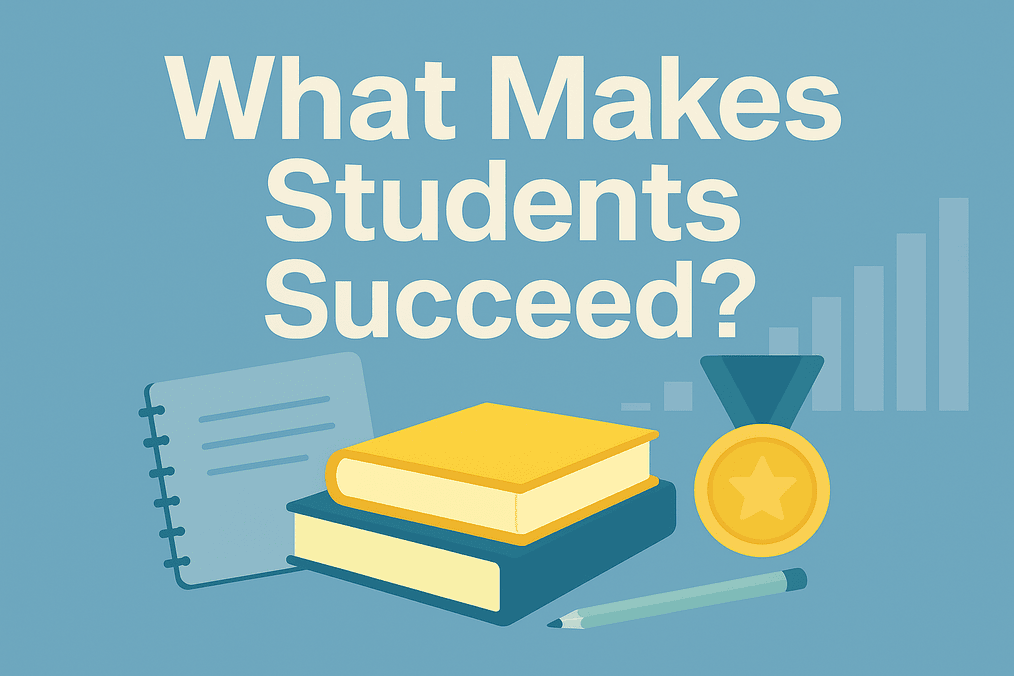
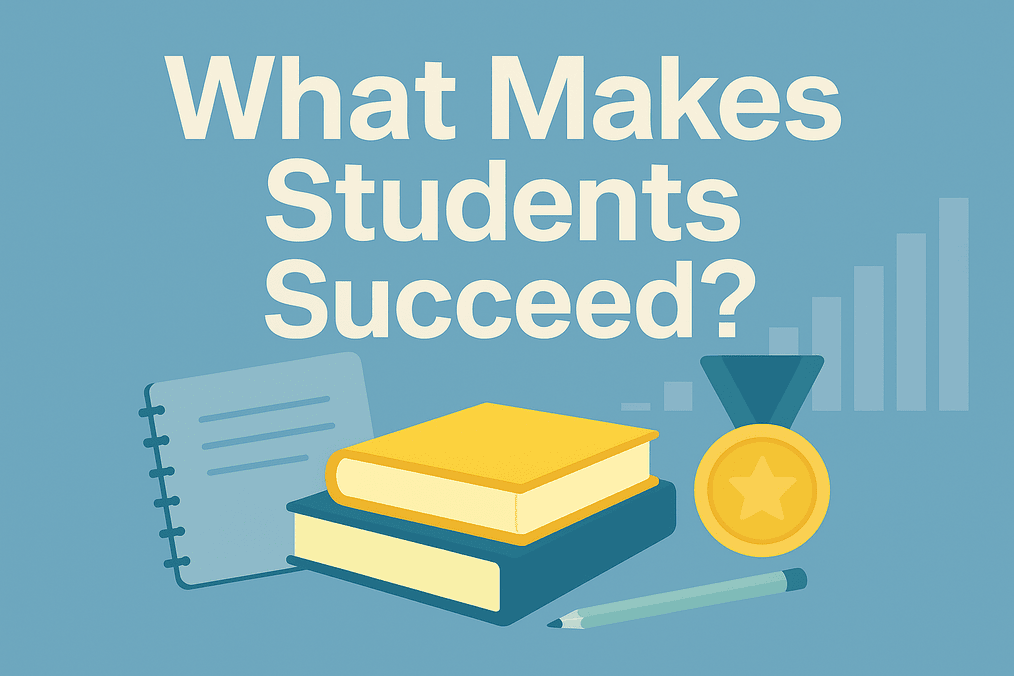

# 🎓 What Makes Students Succeed?

Why do some students excel while others fall behind — even when effort levels seem similar?  
Is it family background? Nutrition? Or access to preparation resources?

In this notebook, I conduct a focused data analysis to uncover key factors behind student performance.  
Using Python, pandas, and data visualization techniques, I analyze patterns in gender, lunch types, parental education, and test preparation — and how they relate to academic success.

This is not just an exercise in statistics — it’s a demonstration of analytical thinking, data storytelling, and real-world insight.

Let’s uncover what truly helps students succeed.

# 🧰 Setup and Imports 

Before we dive into the analysis, let’s import the libraries and load the datasets.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Other utilities
from IPython.display import display

In [2]:
#  Reading the dataset:Students Performance
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# 📋 A Quick Look at the Data

Before diving into analysis, let’s get acquainted with our dataset — 
How big is it? Are there any missing pieces? What kind of variables are we dealing with?

Just like knowing the ingredients before cooking, understanding the shape and structure of our data sets the stage for every meaningful insight.

  ### Preview of the Dataset       

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The dataset contains 1,000 entries across 8 columns — and the good news is, there are no missing values.

The three exam scores (math, reading, and writing) are numerical, while the remaining columns are categorical.

This clean and well-structured dataset gives us a strong foundation for building visualizations and drawing meaningful insights.

### Column Definitions

- **gender**: Student’s gender (male or female).
- **race/ethnicity**: Group classification, possibly representing cultural or socioeconomic background.
- **parental level of education**: Highest education level achieved by either parent.
- **lunch**: Type of lunch the student receives (standard or free/reduced).
- **test preparation course**: Whether the student completed a prep course or not.
- **math score**: Score in the math exam (0 to 100).
- **reading score**: Score in the reading exam (0 to 100).
- **writing score**: Score in the writing exam (0 to 100).


### Descriptive Statistics

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


On average, students scored around 66 in math, 69 in reading, and 68 in writing — a fairly balanced performance across subjects.

One curious detail stands out: the lowest math score is 0. Did someone skip the test? That’s a story the data might hint at.

Most scores cluster between 60 and 80, setting a baseline we’ll build upon as we search for what helps students excel.

# 🧹 Data Cleaning and Preparation

###  Check for Missing Values          

In [6]:
#  Check for missing values 
print("Missing values in dataset:")
display(df.isnull().sum())

Missing values in dataset:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Although our initial overview (`df.info()`) showed no missing values, it’s good practice to explicitly check for them.

This confirms that our dataset is clean and ready for further analysis, and also maintains clarity and reproducibility in our data preparation workflow.


### Check for Duplicate Rows             

In [7]:
#  Check and remove duplicates 
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


Duplicate entries can skew analysis and introduce bias.  
Here, we check for and remove any duplicate rows to ensure each observation is unique.

✅ **No duplicate rows were found.**

In [8]:
# Inspect unique values and distribution of categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    print(f"\nUnique '{col}' and their record counts:\n")
    print(df[col].value_counts())


Unique 'gender' and their record counts:

gender
female    518
male      482
Name: count, dtype: int64

Unique 'race/ethnicity' and their record counts:

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Unique 'parental level of education' and their record counts:

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Unique 'lunch' and their record counts:

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Unique 'test preparation course' and their record counts:

test preparation course
none         642
completed    358
Name: count, dtype: int64


From the output, we observe that all categorical columns contain clearly defined values with no inconsistencies or unexpected entries.  
This confirms that the data is clean, balanced enough for exploration, and ready for further analysis.

###  Detect and Explore Outliers       

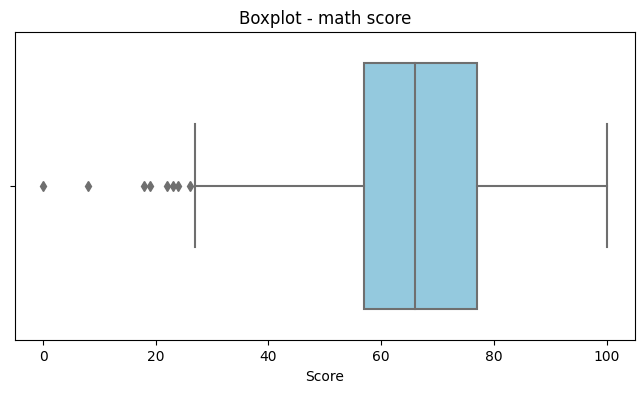

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['math score'], color='skyblue')
plt.title("Boxplot - math score")
plt.xlabel("Score")
plt.show()

This boxplot provides a quick overview of the distribution of math scores in the dataset.  
We can observe that the distribution is **slightly skewed to the left**, with a few **low-end outliers** indicating students who scored exceptionally low.  
Most scores are concentrated between approximately **60 and 80**, showing that the majority of students performed moderately well.  
Despite the presence of outliers, the data appears **generally clean and usable** for further statistical analysis.

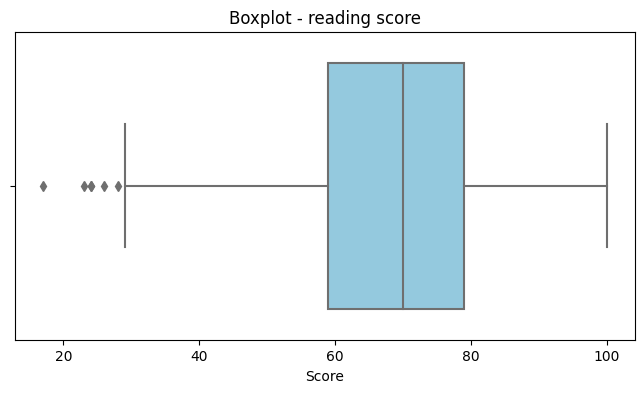

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['reading score'], color='skyblue')
plt.title("Boxplot - reading score")
plt.xlabel("Score")
plt.show()

This boxplot provides a quick overview of the distribution of reading scores in the dataset.  
We can observe that the distribution is **slightly skewed to the left**, with a few **low-end outliers** suggesting that some students scored significantly below the average.  
Most scores are concentrated between approximately **60 and 80**, indicating that the majority of students had average to above-average reading performance.  
Despite the presence of some outliers, the data appears **generally clean and suitable** for further analysis.

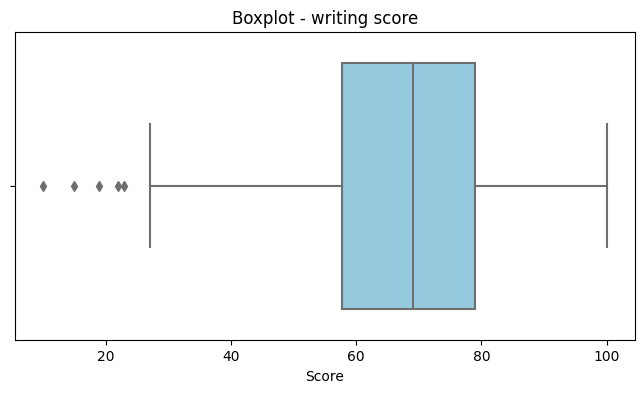

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['writing score'], color='skyblue')
plt.title("Boxplot - writing score")
plt.xlabel("Score")
plt.show()

This boxplot provides a quick overview of the distribution of writing scores in the dataset.  
We can observe that the distribution is **slightly skewed to the left**, with a few **low-end outliers** representing students who performed poorly.  
Most scores are concentrated between approximately **60 and 80**, suggesting that the majority of students achieved average to above-average results.  
Despite the presence of some outliers, the data appears **generally clean and suitable** for further analysis.

# 🔍📈 Data Exploration and Visualization

## 👩‍🎓👨‍🎓 Who Scores What? A Gender-Based Deep Dive

Let’s start by looking at how many students belong to each gender and how their average scores compare — all using pandas.  
We’ll also explore score ranges to understand variability, and dig deeper into the subjects where boys and girls excel.


### 🧮 Gender Distribution


In [12]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
female    518
male      482
Name: count, dtype: int64

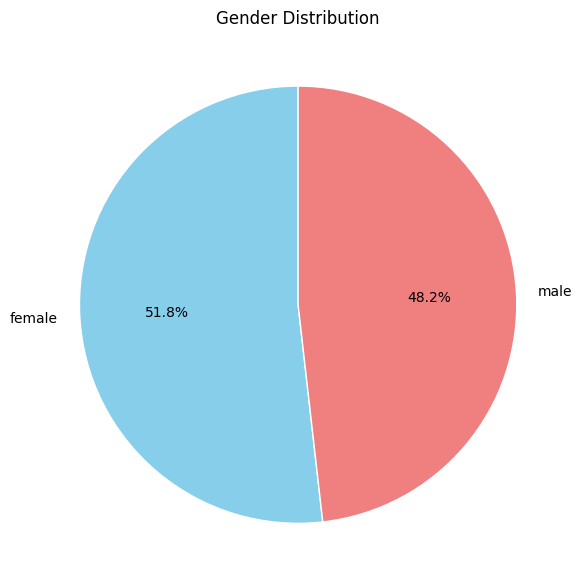

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],  
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

There are slightly more **female students (518)** than **male students (482)** in the dataset.  
This **small difference** is important to keep in mind as we compare **average scores** later.


### 📊 Average Scores by Gender

In [14]:
gender_mean_score = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_mean_score

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


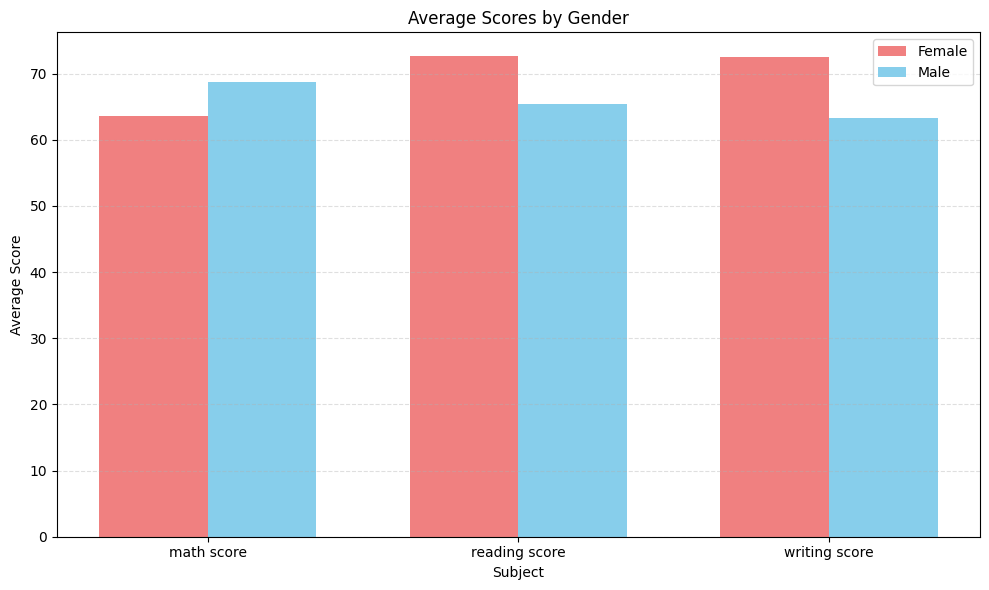

In [15]:
x = np.arange(len(gender_mean_score.columns))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, gender_mean_score.loc['female'], width, label='Female', color='lightcoral')
plt.bar(x + width/2, gender_mean_score.loc['male'], width, label='Male', color='skyblue')

plt.title("Average Scores by Gender")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(x, gender_mean_score.columns)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

On average, **male students** score higher in **math** (≈ **68.7 vs. 63.6**),  
while **female students** outperform in **reading** (≈ **72.6 vs. 65.5**) and **writing** (≈ **72.5 vs. 63.3**).

This suggests that **gender may influence performance** across subjects —  
but we’ll need to **explore further** before drawing firm conclusions.


### 📈 Score Ranges by Gender


In [16]:
score_ranges = df.groupby("gender")[["math score", "reading score", "writing score"]].agg(["min", "max"])
score_ranges

math score      reading score      writing score     
              min  max           min  max           min  max
gender                                                      
female          0  100            17  100            10  100
male           27  100            23  100            15  100

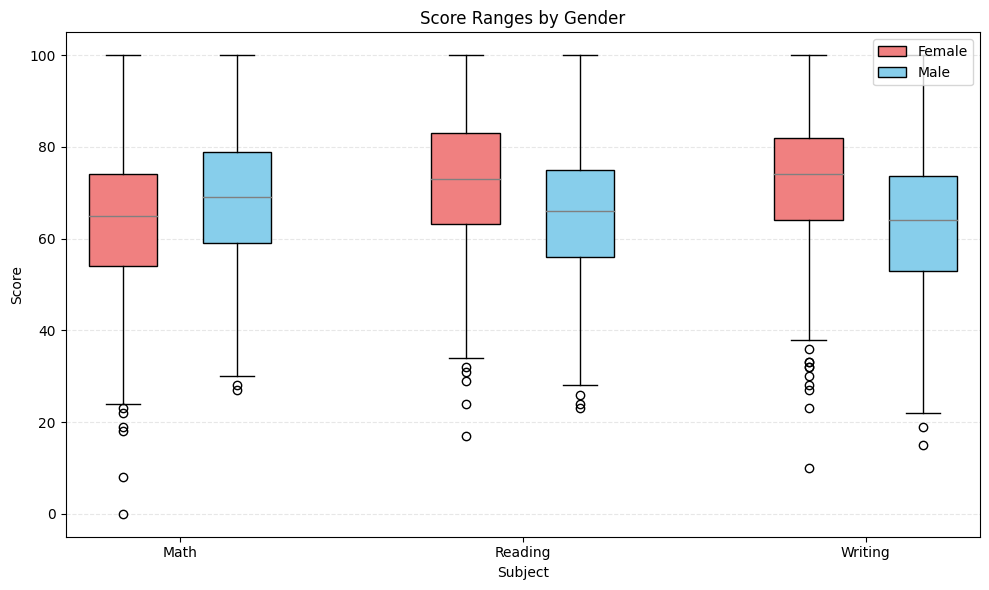

In [17]:
# Separate scores by gender to enable side-by-side comparison in boxplots
female_scores = df[df['gender'] == 'female'][['math score', 'reading score', 'writing score']]
male_scores = df[df['gender'] == 'male'][['math score', 'reading score', 'writing score']]

colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(10, 6))

# Create side-by-side boxplots for math, reading, and writing scores by gender
box1 = plt.boxplot([female_scores['math score'], male_scores['math score']], 
                   positions=[1, 2], widths=0.6, patch_artist=True)
box2 = plt.boxplot([female_scores['reading score'], male_scores['reading score']], 
                   positions=[4, 5], widths=0.6, patch_artist=True)
box3 = plt.boxplot([female_scores['writing score'], male_scores['writing score']], 
                   positions=[7, 8], widths=0.6, patch_artist=True)

# Apply custom colors and gray median lines to each gender's boxplot per subject
for box, median in zip(box1['boxes'], box1['medians']):
    box.set_facecolor(colors[box1['boxes'].index(box)])
    median.set_color("grey") 
    
for box, median in zip(box2['boxes'], box2['medians']):
    box.set_facecolor(colors[box2['boxes'].index(box)])
    median.set_color("grey")

for box, median in zip(box3['boxes'], box3['medians']):
    box.set_facecolor(colors[box3['boxes'].index(box)])
    median.set_color("grey")


plt.xticks([1.5, 4.5, 7.5], ['Math', 'Reading', 'Writing'])
plt.xlabel("Subject")
plt.ylabel("Score")
plt.title("Score Ranges by Gender")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add legend to differentiate between Female and Male boxplots
plt.legend([box1["boxes"][0], box1["boxes"][1]], ["Female", "Male"], loc="upper right")

plt.tight_layout()
plt.show()


When we examine the distribution of scores across genders using box plots, a more detailed pattern begins to emerge:

**Girls show wider score variability** in all three subjects, particularly in math and writing, where their interquartile ranges are broader and low-end outliers are more frequent. Despite this variability, **their medians are consistently higher**, especially in writing and reading.

**Boys exhibit tighter score distributions** with fewer extreme low values, most notably in math. However, their **top scores remain comparable** to those of the girls.

This suggests that while **girls' performance spans a broader range**, they tend to **outperform boys on average**, especially in language-related subjects.  
Box plots help visualize not just extremes but **the full spread of performance**, offering a richer picture than simple min/max comparisons.

> _Note: While box plots were previously used during data cleaning to detect outliers, here they provide a gender-based comparison of score distributions across subjects._


### 🔍 Girls vs Themselves


In [18]:
female_scores = df[df["gender"] == "female"][["math score", "reading score", "writing score"]].mean()
female_scores.sort_values(ascending=False)

reading score    72.608108
writing score    72.467181
math score       63.633205
dtype: float64

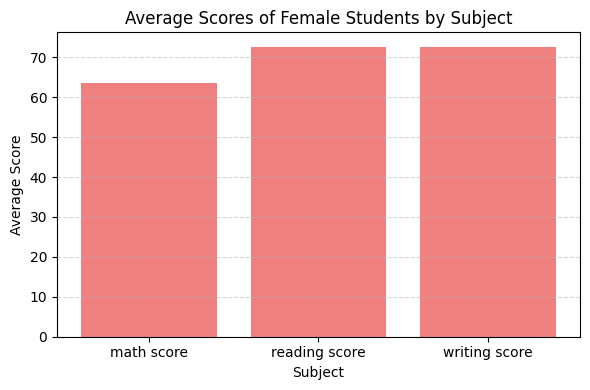

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(female_scores.index, female_scores.values, color="lightcoral")
plt.title("Average Scores of Female Students by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Let’s see how female students performed across different subjects — where do they shine the most?

On average:

- **Reading** is their **strongest subject** (≈ **72.6**).  
- **Writing** follows closely (≈ **72.5**).  
- **Math** trails behind a bit (≈ **63.6**).

It appears that girls **excel in language-related subjects**, while **math offers more room for growth**.  
However, averages don’t tell the whole story — we’ll dig deeper!


### 🔍 Boys vs Themselves

In [20]:
male_scores = df[df["gender"] == "male"][["math score", "reading score", "writing score"]].mean()
male_scores.sort_values(ascending=False)

math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64

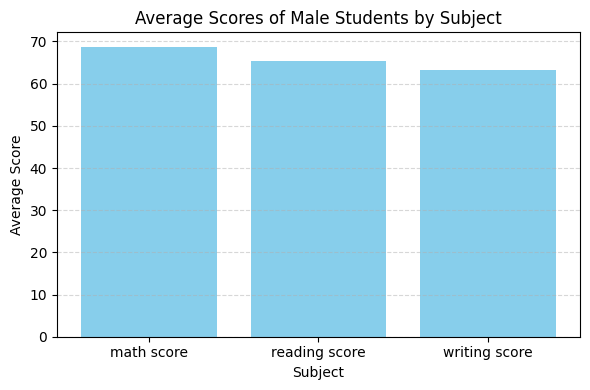

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(male_scores.index, male_scores.values, color="skyblue")
plt.title("Average Scores of Male Students by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Let’s see how male students performed across different subjects — where do they shine the most?

On average:

- **Math** is their **strongest subject** (≈ **68.7**).  
- **Reading** follows (≈ **65.5**).  
- **Writing** comes last (≈ **63.3**).

It appears that boys tend to **perform best in math**, while **language-related subjects** have slightly lower averages.  
As always, we’ll need to explore further to get the full picture.


 ### 📚 Subject-wise Gender Comparison

In [22]:
gender_means = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
gender_means.T.sort_values(by="female", ascending=False)
subject_comparison = gender_means.T  
subject_comparison 

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


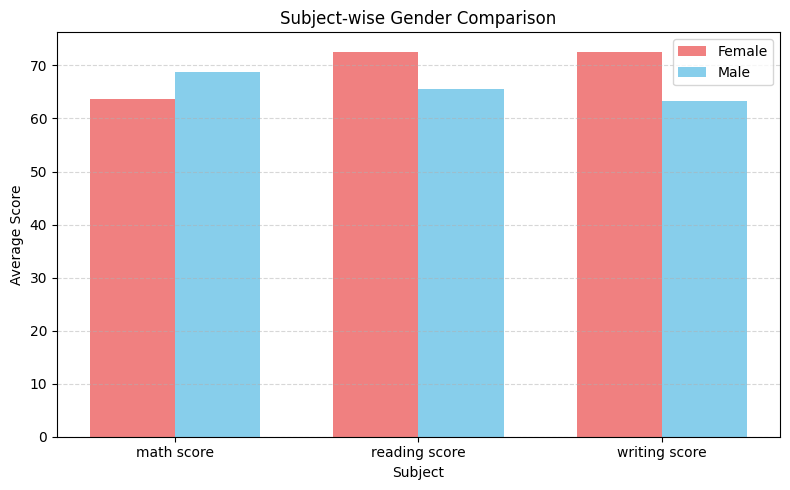

In [23]:
x = np.arange(len(subject_comparison.index))  
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, subject_comparison["female"], width, label="Female", color="lightcoral")
plt.bar(x + width/2, subject_comparison["male"], width, label="Male", color="skyblue")

plt.title("Subject-wise Gender Comparison")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(x, subject_comparison.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Let’s compare how **boys and girls** perform in each subject — who has the **upper hand**?

On average:

- **Reading:** Girls lead by a **wide margin** (≈ **72.6 vs. 65.5**).  
- **Writing:** Girls again **take the top spot** (≈ **72.5 vs. 63.3**).  
- **Math:** This time, **boys outperform girls** (≈ **68.7 vs. 63.6**).

It appears that **girls consistently excel** in **language-based subjects**,  
while **boys have a clear edge in math**.  
These patterns deserve **further exploration** — is it due to **background**, **support**, or **preferences**? Let’s continue!


### 📝 Summary: Who Scores What?

So far, **gender seems to influence** student performance — with **girls generally excelling in reading and writing**,  
while **boys lead in math**.  
We’ve also observed that **female students display a wider range of scores**,  
indicating both **high achievers** and **lower outliers**.

But is **gender the main factor** driving student success?  
Or are there other **hidden influences** — like **lunch**, **test preparation**, or **parental background** — shaping these results?

Let’s **explore further** to find out.







## 🥪 Does Lunch Matter? What Eating Says About Performance

What’s on the lunch menu — and does it really make a difference?  
Let’s explore how students with standard lunches compare to those with free or reduced lunches in math, reading, and writing scores.  
This may reveal how economic background influences academic success.



### 📌 Lunch Type Distribution


In [24]:
lunch_counts = df['lunch'].value_counts()
lunch_counts

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

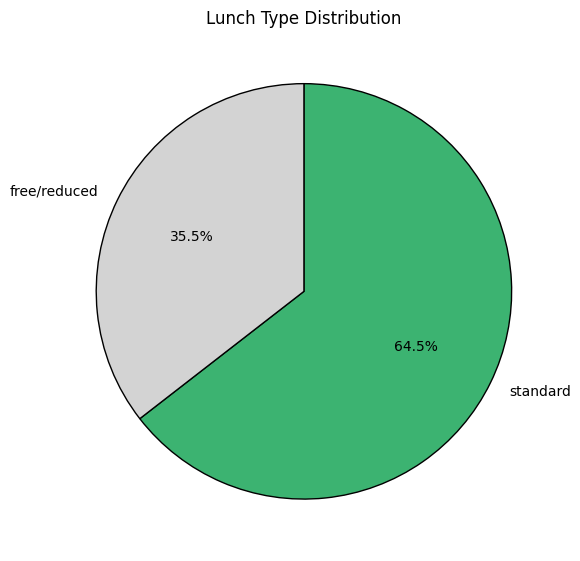

In [25]:
colors = ['mediumseagreen', 'lightgray']

plt.figure(figsize=(6,6))
plt.pie(lunch_counts.values, labels=lunch_counts.index, autopct='%1.1f%%', colors=colors,
        startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})
plt.title("Lunch Type Distribution")
plt.tight_layout()
plt.show()

Most students (**645**) had a **standard lunch**, while **355** received **free or reduced lunch** —  
indicating a significant portion come from lower-income backgrounds.


### 📊 Average Scores by Lunch Type


In [26]:
lunch_scores = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
lunch_scores = lunch_scores.T 
lunch_scores

lunch,free/reduced,standard
math score,58.921127,70.034109
reading score,64.653521,71.654264
writing score,63.022535,70.823256


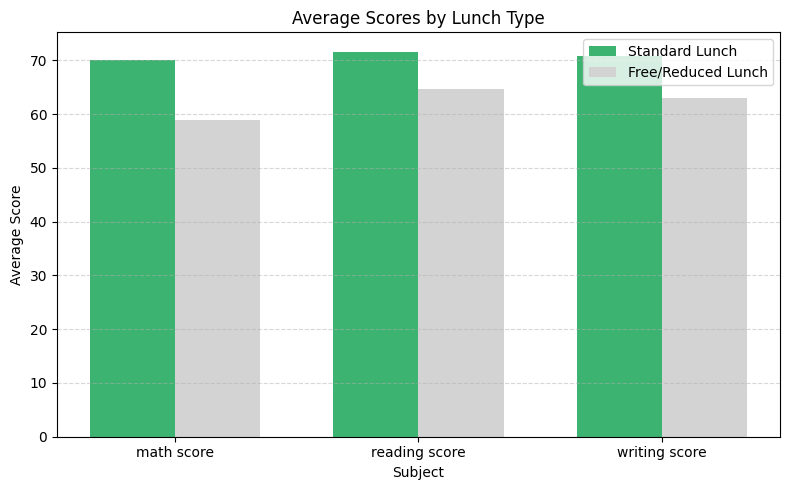

In [27]:
x = np.arange(len(lunch_scores.index))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, lunch_scores["standard"], width, label="Standard Lunch", color="mediumseagreen")
plt.bar(x + width/2, lunch_scores["free/reduced"], width, label="Free/Reduced Lunch", color="lightgray")

plt.title("Average Scores by Lunch Type")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(x, lunch_scores.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Students with a **standard lunch** scored noticeably higher on average across all three subjects compared to those with **free or reduced lunch** —  
suggesting that lunch type (and possibly economic background) may be connected to academic performance.


### 📈 Score Range by Lunch Type


In [28]:
lunch_ranges = df.groupby('lunch')[['math score', 'reading score', 'writing score']].agg(['min', 'max'])
lunch_ranges

math score      reading score      writing score     
                    min  max           min  max           min  max
lunch                                                             
free/reduced          0  100            17  100            10  100
standard             19  100            26  100            22  100

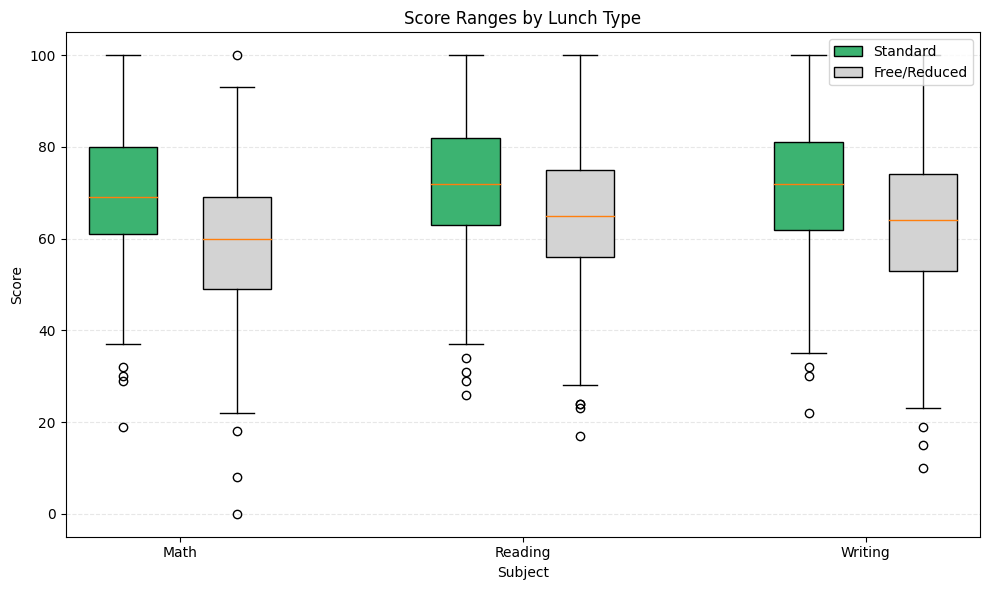

In [29]:
# Separate scores by lunch type to prepare for comparison in boxplots
standard_scores = df[df['lunch'] == 'standard'][['math score', 'reading score', 'writing score']]
reduced_scores = df[df['lunch'] == 'free/reduced'][['math score', 'reading score', 'writing score']]

colors = ['mediumseagreen', 'lightgray']

plt.figure(figsize=(10, 6))

# Create side-by-side boxplots for math, reading, and writing scores by lunch type
box1 = plt.boxplot([standard_scores['math score'], reduced_scores['math score']],
                   positions=[1, 2], widths=0.6, patch_artist=True)
box2 = plt.boxplot([standard_scores['reading score'], reduced_scores['reading score']],
                   positions=[4, 5], widths=0.6, patch_artist=True)
box3 = plt.boxplot([standard_scores['writing score'], reduced_scores['writing score']],
                   positions=[7, 8], widths=0.6, patch_artist=True)

# Apply colors to each pair of boxes
for box in box1['boxes']:
    box.set_facecolor(colors[box1['boxes'].index(box)])
for box in box2['boxes']:
    box.set_facecolor(colors[box2['boxes'].index(box)])
for box in box3['boxes']:
    box.set_facecolor(colors[box3['boxes'].index(box)])

plt.xticks([1.5, 4.5, 7.5], ['Math', 'Reading', 'Writing'])
plt.xlabel("Subject")
plt.ylabel("Score")
plt.title("Score Ranges by Lunch Type")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add legend using the first two boxes from the first boxplot
plt.legend([box1['boxes'][0], box1['boxes'][1]], ['Standard', 'Free/Reduced'], loc='upper right')

plt.tight_layout()
plt.show()

While both lunch groups include students who achieved the maximum score of 100,  
the **free or reduced lunch group** shows **greater score variability**, with more frequent **low-end outliers** and **lower minimum scores**, especially in math.  
In contrast, the **standard lunch group** exhibits **higher medians** and a **tighter interquartile range**, suggesting more consistent performance.

### 📝 Summary: Does Lunch Matter?

Lunch might seem like a small detail, but the data tells a **different story**.  
Students with a **standard lunch** scored **higher on average** across all subjects,  
while those with **free or reduced lunch** showed **lower scores** and a **wider range** — including more **very low results**, **highlighting how economic disadvantage may be a hidden barrier to academic success**.

Could this indicate that **economic background has a greater impact on student performance** than we might expect?  
Let’s continue exploring — perhaps **test preparation** or **parental education** reveal more insights.

## 📚 Who Performs Better? Prepared vs. Unprepared

Does taking a prep course really help students succeed?  
Let’s find out if students who completed the test preparation course scored higher than those who didn’t.  
We’ll compare their average scores to see whether that extra effort made a difference.


### 📌 Test Prep Course Participation


In [30]:
prep_counts = df["test preparation course"].value_counts()
prep_counts

test preparation course
none         642
completed    358
Name: count, dtype: int64

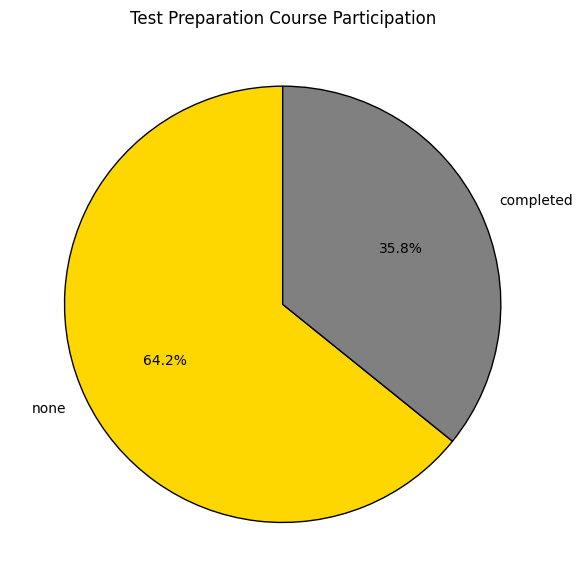

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(prep_counts.values, labels=prep_counts.index, autopct='%1.1f%%', startangle=90,
        colors=["gold", "gray"], wedgeprops={'edgecolor': 'black'})
plt.title("Test Preparation Course Participation")
plt.tight_layout()
plt.show()

Out of 1,000 students, **358 completed** the test preparation course, while **642 did not**.  
That’s over a third of students putting in extra effort — let’s find out if it paid off!


### 📊  Average Scores by Test Prep Status


In [32]:
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_scores = prep_scores.T  
prep_scores 

test preparation course,completed,none
math score,69.695531,64.077882
reading score,73.893855,66.534268
writing score,74.418994,64.504673


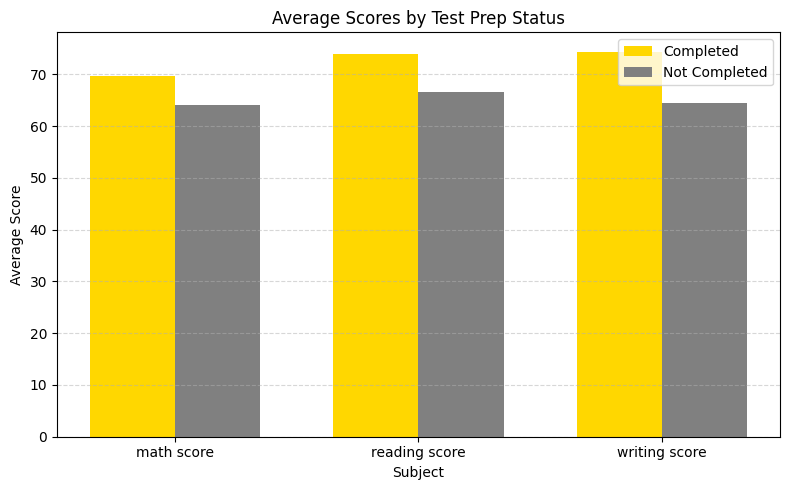

In [33]:
x = np.arange(len(prep_scores.index))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, prep_scores["completed"], width, label="Completed", color="gold")
plt.bar(x + width/2, prep_scores["none"], width, label="Not Completed", color="gray")

plt.title("Average Scores by Test Prep Status")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(x, prep_scores.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Students who completed the test preparation course scored **higher on average** across all three subjects — especially in reading and writing, with a gap of 8 to 10 points.  
It seems a bit of extra preparation really makes a difference!  
**This highlights how preparation — not just natural ability — can be a key to academic success.**

### 📈 Score Range by Test Prep Status 



In [34]:
prep_ranges = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].agg(['min', 'max'])
prep_ranges

math score      reading score      writing score     
                               min  max           min  max           min  max
test preparation course                                                      
completed                       23  100            37  100            36  100
none                             0  100            17  100            10  100

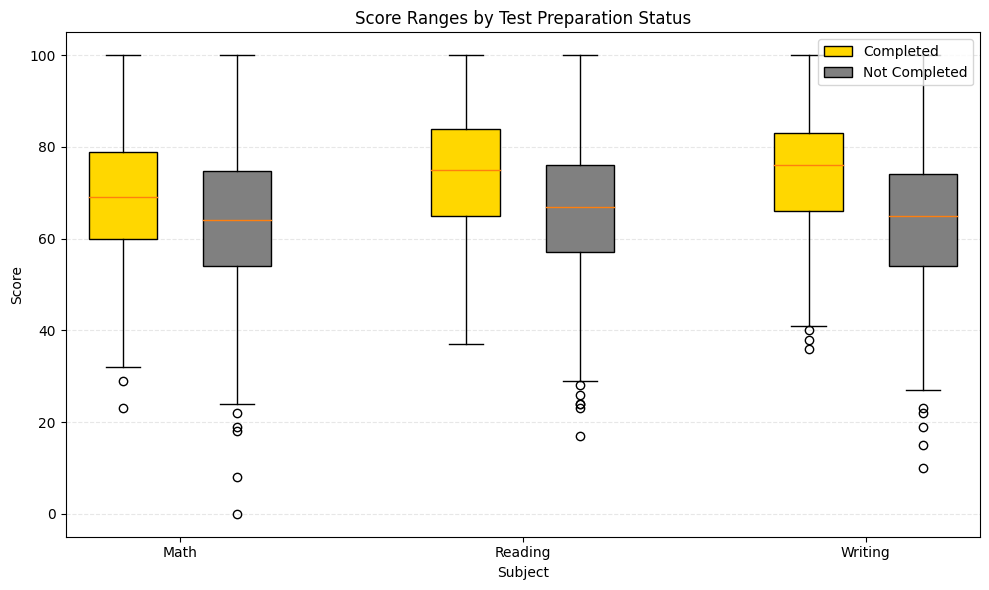

In [35]:
# Separate scores by test preparation status
completed_scores = df[df['test preparation course'] == 'completed'][['math score', 'reading score', 'writing score']]
none_scores = df[df['test preparation course'] == 'none'][['math score', 'reading score', 'writing score']]

colors = ['gold', 'gray']

plt.figure(figsize=(10, 6))

# Create side-by-side boxplots for each subject
box1 = plt.boxplot([completed_scores['math score'], none_scores['math score']],
                   positions=[1, 2], widths=0.6, patch_artist=True)
box2 = plt.boxplot([completed_scores['reading score'], none_scores['reading score']],
                   positions=[4, 5], widths=0.6, patch_artist=True)
box3 = plt.boxplot([completed_scores['writing score'], none_scores['writing score']],
                   positions=[7, 8], widths=0.6, patch_artist=True)

# Apply colors to each group of boxes
for box in box1['boxes']:
    box.set_facecolor(colors[box1['boxes'].index(box)])
for box in box2['boxes']:
    box.set_facecolor(colors[box2['boxes'].index(box)])
for box in box3['boxes']:
    box.set_facecolor(colors[box3['boxes'].index(box)])


plt.xticks([1.5, 4.5, 7.5], ['Math', 'Reading', 'Writing'])
plt.xlabel("Subject")
plt.ylabel("Score")
plt.title("Score Ranges by Test Preparation Status")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add legend using first two boxes from the first plot
plt.legend([box1['boxes'][0], box1['boxes'][1]], ['Completed', 'Not Completed'], loc='upper right')

plt.tight_layout()
plt.show()


**Students who didn’t complete the test preparation course** had significantly **lower minimum scores**, especially in math — including scores as low as zero.  
In contrast, **those who completed the course** not only achieved **higher minimums** but also had **fewer extreme low scores** overall.

This suggests that **test preparation helps raise the performance floor** — not just the average.  
**In other words, test prep doesn't just improve performance — it helps prevent failure.**

### 📝 Summary: Who Performs Better? Prepared vs. Unprepared

Students who **completed the test preparation course** not only **scored higher on average** —  
they also **avoided extremely low scores**, especially in **reading and writing**.  
While it’s not a **magic formula**, focused preparation appears to give students a **clear advantage**.  
So yes, when it comes to tests, **preparation makes a difference** — and the **data confirms it**.


## 🎓 Parents’ Education: A Hidden Boost?

Does having more educated parents help students perform better?  
Let’s explore how student scores vary based on their parents’ education level —  
and see if higher degrees at home translate into higher grades at school.


### 📌  Parental Education Distribution

In [36]:
education_counts = df['parental level of education'].value_counts()
education_counts

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

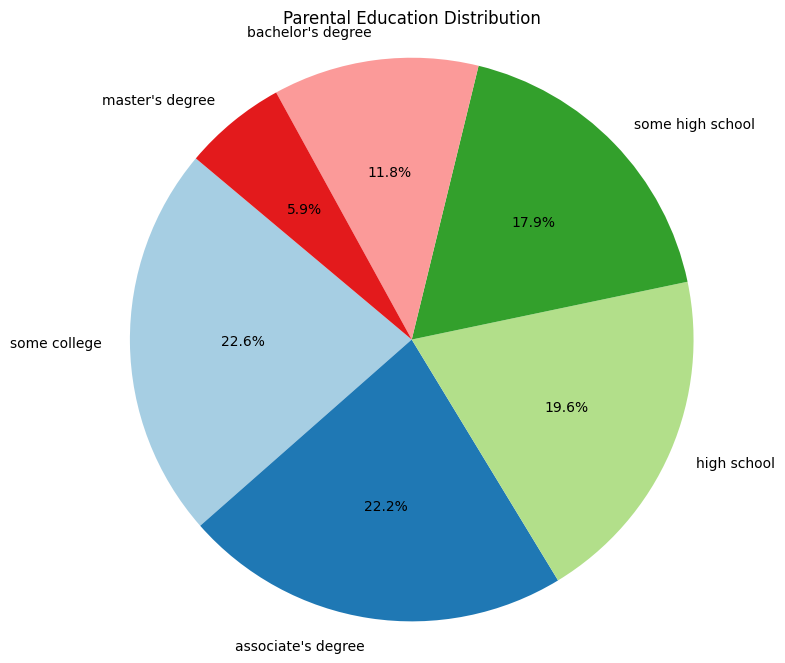

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Parental Education Distribution")
plt.axis('equal')
plt.show()

Most students come from families where parents have **some college** or an **associate’s degree**, while fewer have parents with a **bachelor’s or master’s degree**.  
Let’s explore whether higher parental education translates into higher student scores!


### 📊 Average Scores by Parental Education

In [38]:
edu_means = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
edu_means

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


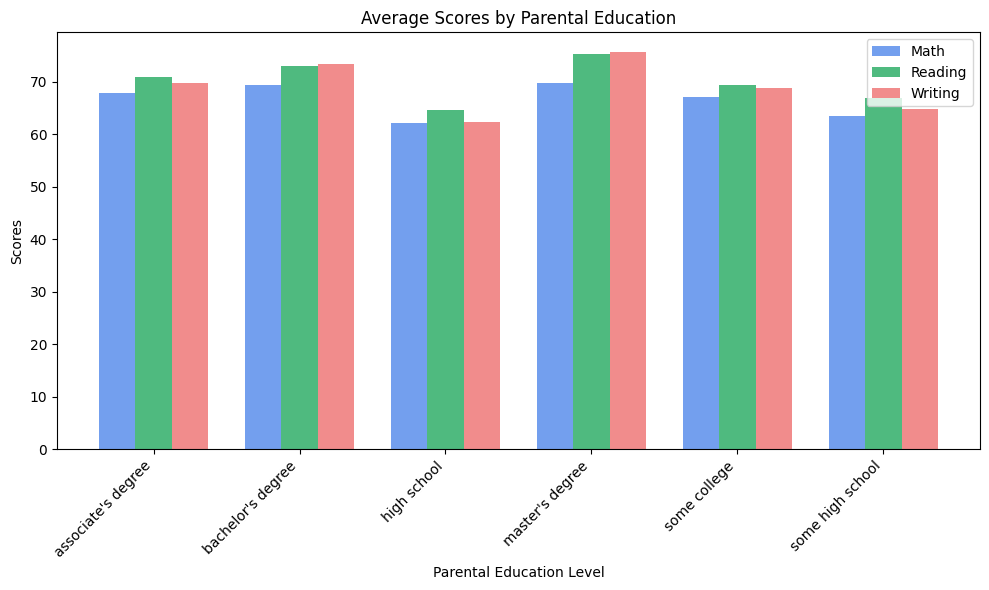

In [39]:
x = np.arange(len(edu_means.index))
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, edu_means['math score'], width, label='Math', color='cornflowerblue', alpha=0.9)
plt.bar(x, edu_means['reading score'], width, label='Reading', color='mediumseagreen', alpha=0.9)
plt.bar(x + width, edu_means['writing score'], width, label='Writing', color='lightcoral', alpha=0.9)

plt.title("Average Scores by Parental Education")
plt.xlabel("Parental Education Level")
plt.ylabel("Scores")
plt.xticks(x, edu_means.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The pattern is clear: students with more educated parents — especially those with a **bachelor’s or master’s degree** — tend to score higher across all subjects.  
This suggests that **parental education may be linked to stronger academic support at home**.


### 📈  Score Range by Parental Education 

In [40]:
edu_ranges = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].agg(['min', 'max'])
edu_ranges

math score      reading score      writing score  \
                                   min  max           min  max           min   
parental level of education                                                    
associate's degree                  26  100            31  100            35   
bachelor's degree                   29  100            41  100            38   
high school                          8   99            24   99            15   
master's degree                     40   95            42  100            46   
some college                        19  100            23  100            19   
some high school                     0   97            17  100            10   

                                  
                             max  
parental level of education       
associate's degree           100  
bachelor's degree            100  
high school                  100  
master's degree              100  
some college                  99  
some high school             100

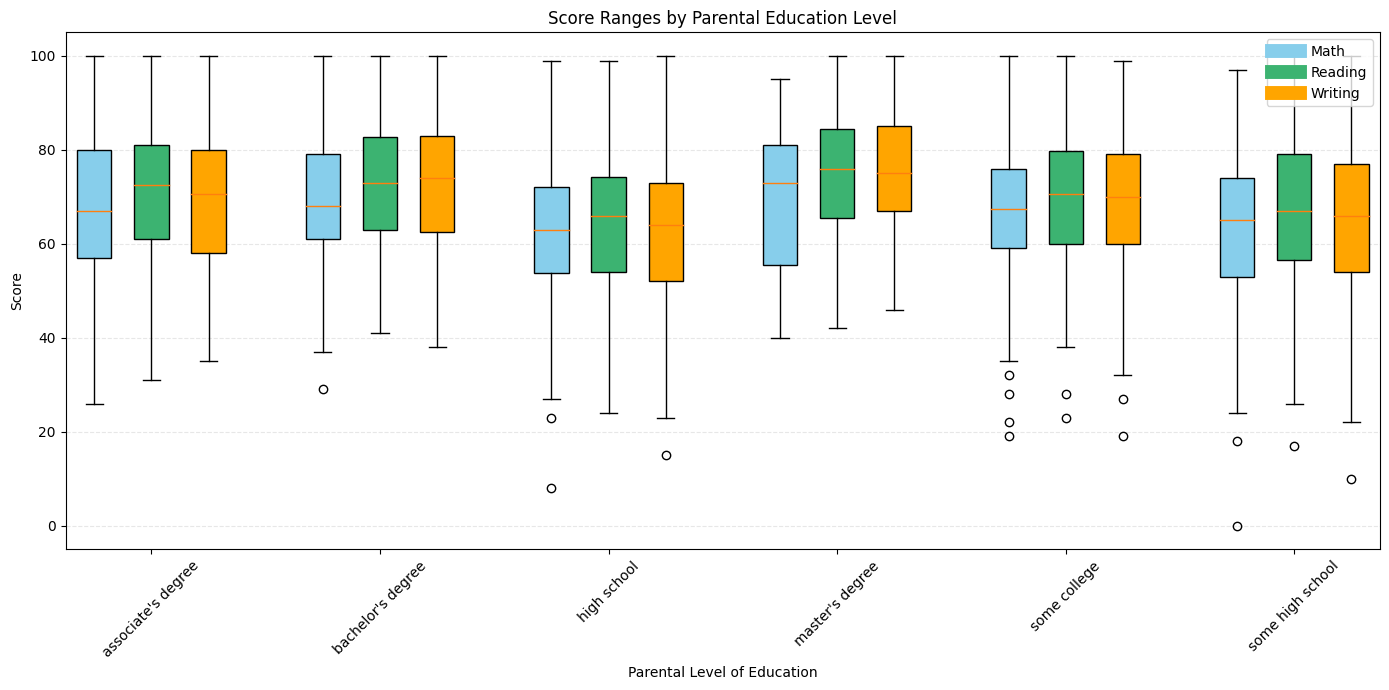

In [41]:
# Separate scores by parental education level
edu_levels = df['parental level of education'].unique()
edu_levels.sort()

math_scores = [df[df['parental level of education'] == level]['math score'] for level in edu_levels]
reading_scores = [df[df['parental level of education'] == level]['reading score'] for level in edu_levels]
writing_scores = [df[df['parental level of education'] == level]['writing score'] for level in edu_levels]

positions = []
colors = ['skyblue', 'mediumseagreen', 'orange']  # Math, Reading, Writing
labels = ['Math', 'Reading', 'Writing']

plt.figure(figsize=(14, 7))

# Plot all three subjects side by side for each education level
for i in range(len(edu_levels)):
    pos_base = i * 4  # space between each group
    b1 = plt.boxplot(math_scores[i], positions=[pos_base], widths=0.6, patch_artist=True)
    b2 = plt.boxplot(reading_scores[i], positions=[pos_base + 1], widths=0.6, patch_artist=True)
    b3 = plt.boxplot(writing_scores[i], positions=[pos_base + 2], widths=0.6, patch_artist=True)
    
    for patch in b1['boxes']:
        patch.set_facecolor(colors[0])
    for patch in b2['boxes']:
        patch.set_facecolor(colors[1])
    for patch in b3['boxes']:
        patch.set_facecolor(colors[2])
    
    positions.extend([pos_base, pos_base + 1, pos_base + 2])

plt.xticks([i * 4 + 1 for i in range(len(edu_levels))], edu_levels, rotation=45)
plt.xlabel("Parental Level of Education")
plt.ylabel("Score")
plt.title("Score Ranges by Parental Education Level")


#Add legend for subjects`
legend_patches = [plt.Line2D([0], [0], color=color, lw=10) for color in colors]
plt.legend(legend_patches, labels, loc="upper right")

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

While all parental education groups include students with near-perfect scores, those whose parents hold a **bachelor’s** or **master’s degree** tend to have **higher minimum scores**, particularly in **reading** and **writing**.

In contrast, students whose parents have **lower education levels** show a **wider score range**, including some very **low scores — even zeros**.

This indicates that **higher parental education** may not only improve **average performance** but also **reduce the risk of low achievement**, helping students **stay on track**.

### 📝 Summary: Parents’ Education

Students whose **parents have higher education** — especially **bachelor’s or master’s degrees** —  
tend to **score higher on average** across all subjects.  
They also exhibit **higher minimum scores**,  
suggesting **fewer low-performing students** in those groups.

On the other hand, students whose **parents have no college education**  
show **wider score ranges** and more **low scores**, including **zeros**.

So, while **parental education** isn’t the only factor, it clearly **plays a role** —  
perhaps by fostering a more **supportive** or **resource-rich learning environment** at home.  
Looks like **education runs in the family**!


## 🔗 Skills Connected? A Correlation Study 

Understanding the relationships between different academic subjects can reveal underlying skill overlaps and learning patterns. In this section, we examine how scores in **math**, **reading**, and **writing** relate to one another to uncover hidden connections — for instance, does excelling in math predict strong performance in reading or writing?

In [42]:
# Select only the relevant subject score columns
subject_scores = df[['math score', 'reading score', 'writing score']]

# Calculate the correlation matrix
correlation_matrix = subject_scores.corr()
correlation_matrix

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


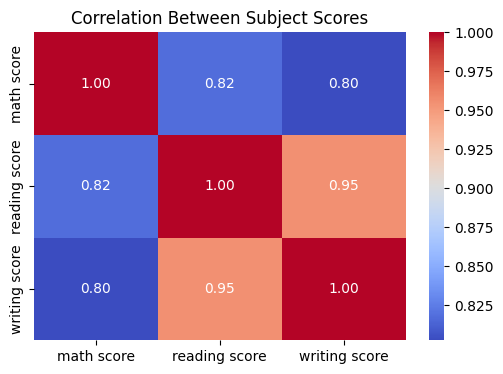

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Subject Scores')
plt.show()

🔹 **Reading vs. Writing**: The correlation is extremely high (**0.95**), suggesting that students who perform well in reading also tend to excel in writing. This points to a strong overlap in language-related skills.

🔹 **Math vs. Reading**: A moderate correlation of **0.82** indicates some shared skills, possibly related to comprehension or problem-solving, but not as strongly linked as the language pair.

🔹 **Math vs. Writing**: A slightly lower correlation (**0.80**) compared to reading, showing that while there’s a connection, math skills may involve more distinct cognitive abilities.

The strongest link lies between **reading** and **writing**, highlighting the synergy between verbal comprehension and written expression. **Math** shows a moderate but distinct relationship with both, implying that mathematical thinking is partly independent from language-related skills.

# 🧠 Final Observations

**Gender Differences:** **Girls perform better** in reading and writing, while **boys excel** in math.

**Lunch Type:** Students with a **standard lunch** generally score **higher** than those with **free or reduced lunch**.

**Test Preparation:** Taking a **test prep course** helps improve **average scores** and reduces **very low scores**.

**Parental Education:** Students with **more educated parents** tend to have **higher average** and **minimum scores** across all subjects.

**Subject Correlation**: Reading and writing scores are highly correlated, indicating strong overlap in language skills, while math is moderately related and shows more independence.

---

### **Unexpected Findings:**

Some students with **less educated parents** still scored **very well**, suggesting that factors like **motivation** or **external support** also play a role.

---

### **Ideas for Further Analysis:**

- Explore the effect of **race/ethnicity** on scores and its interaction with other factors.

- Study how **gender and parental education together** influence performance.

- Investigate the **combined effects of lunch type and test preparation** on results.

- Apply **regression models** to predict scores based on different variables.
